In [1]:
# perform necessary import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import feature_selection as fs 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 

%matplotlib inline

In [3]:
# load datasets
ppl_info = pd.read_csv(r'C:\Users\train_values.csv')
evictions = pd.read_csv(r'C:\Users\train_labels.csv')

In [4]:
# remove duplicates
print(ppl_info.shape)
print(ppl_info.row_id.unique().shape)
ppl_info.drop_duplicates(subset = 'row_id', keep = 'last', inplace = True)
print(ppl_info.shape)
print(ppl_info.row_id.unique().shape)

(2546, 48)
(2546,)
(2546, 48)
(2546,)


In [5]:
# remove duplicates
print(evictions.shape)
print(evictions.row_id.unique().shape)
evictions.drop_duplicates(subset = 'row_id', keep = 'last', inplace = True)
print(evictions.shape)
print(evictions.row_id.unique().shape)

(2546, 2)
(2546,)
(2546, 2)
(2546,)


In [6]:
# check for missing values
(ppl_info.astype(np.object).isnull()).any()
(evictions.astype(np.object).isnull()).any()

row_id       False
evictions    False
dtype: bool

Merge data for analysis.

In [7]:
combined = ppl_info
combined = ppl_info.merge(evictions, on='row_id', how='left')
combined.head()

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictions
0,0,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,98494.0,...,0.532,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112,681
1,1,583e0c7,a,533155c,9872.0,1224.0,31.773,517.0,43724.0,85444.0,...,0.509,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843,0
2,2,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,136162.0,...,0.451,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741,29
3,3,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,70062.0,...,0.519,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072,841
4,4,47a9ba3,a,be99678,6936.0,551.0,17.627,668.0,44237.0,187066.0,...,0.487,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877,2


In [8]:
#check missing values
combined.isna().any()

row_id                                        False
county_code                                   False
year                                          False
state                                         False
population                                    False
renter_occupied_households                    False
pct_renter_occupied                           False
median_gross_rent                             False
median_household_income                        True
median_property_value                          True
rent_burden                                   False
pct_white                                     False
pct_af_am                                     False
pct_hispanic                                  False
pct_am_ind                                    False
pct_asian                                     False
pct_nh_pi                                     False
pct_multiple                                  False
pct_other                                     False
poverty_rate

In [9]:
combined[['evictions']].describe()

,evictions
count,2546.000000
mean,378.048311
std,1405.276610
min,0.000000
25%,4.000000
50%,29.000000
75%,160.750000
max,29251.000000


In [10]:
combined[combined['median_household_income'].isna()]

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictions
2306,2306,95253e1,a,930f257,116.0,14.0,50.677,871.0,NaN,93217.0,...,0.467,0.273,0.095,0.198610,0.518371,0.264151,0.018868,9.900990,9.900990,0
2377,2377,95253e1,b,930f257,116.0,14.0,50.971,870.0,NaN,93221.0,...,0.461,0.126,0.099,0.196985,0.521608,0.262312,0.019095,21.052632,10.526316,0


In [11]:
combined[combined['median_property_value'].isna()]

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictions
1461,1461,375421b,b,930f257,563.0,95.0,67.695,558.0,36438.0,NaN,...,0.485,0.253,0.147,0.322645,0.333667,0.192385,0.151303,9.523810,7.142857,0
1816,1816,375421b,a,930f257,570.0,96.0,67.239,558.0,36438.0,NaN,...,0.496,0.219,0.162,0.322000,0.336000,0.192000,0.150000,7.263923,0.000000,0


In [12]:
# Fill up NA values with Mean
combined['median_household_income'].fillna(combined['median_household_income'].mean(),inplace=True)
combined['median_property_value'].fillna(combined['median_property_value'].mean(),inplace=True)

In [13]:
#drop columns with NA values
combined.drop(['pct_adult_smoking',
'pct_low_birthweight',
'pct_excessive_drinking',
'air_pollution_particulate_matter_value',
'homicides_per_100k',
'motor_vehicle_crash_deaths_per_100k',
'pop_per_dentist',
'pop_per_primary_care_physician'],axis=1,inplace=True)

In [14]:
combined.isna().any()

row_id                                        False
county_code                                   False
year                                          False
state                                         False
population                                    False
renter_occupied_households                    False
pct_renter_occupied                           False
median_gross_rent                             False
median_household_income                       False
median_property_value                         False
rent_burden                                   False
pct_white                                     False
pct_af_am                                     False
pct_hispanic                                  False
pct_am_ind                                    False
pct_asian                                     False
pct_nh_pi                                     False
pct_multiple                                  False
pct_other                                     False
poverty_rate

In [15]:
combined.dtypes

row_id                                          int64
county_code                                    object
year                                           object
state                                          object
population                                    float64
renter_occupied_households                    float64
pct_renter_occupied                           float64
median_gross_rent                             float64
median_household_income                       float64
median_property_value                         float64
rent_burden                                   float64
pct_white                                     float64
pct_af_am                                     float64
pct_hispanic                                  float64
pct_am_ind                                    float64
pct_asian                                     float64
pct_nh_pi                                     float64
pct_multiple                                  float64
pct_other                   

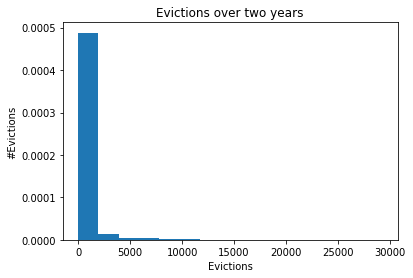

In [17]:
plt.hist(combined['evictions'],density=True,bins=15)
plt.title('Evictions over two years')
plt.xlabel ('Evictions')
plt.ylabel ('#Evictions')
plt.show()

Now it is time to prepare the data for training.

1.We will be doing one-hot encoding for categorical variables.    
2.Converting features to numpy arrays for scikit learn ML library.

In [19]:
#sqaure Evictions
combined['evictionsSqrt'] = np.floor(np.sqrt(combined['evictions']))

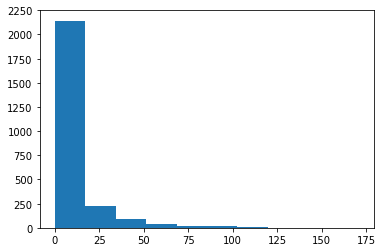

In [21]:
plt.hist(combined['evictionsSqrt'])
plt.show()

In [45]:
correlationGrid=combined[['evictions','population','renter_occupied_households','median_household_income','median_gross_rent','median_property_value','rent_burden','pct_renter_occupied','pct_white','pct_af_am','pct_hispanic','pct_am_ind','pct_asian','pct_multiple','poverty_rate','pct_unemployment','pct_uninsured_adults','pct_uninsured_children','pct_female','pct_adults_less_than_a_high_school_diploma','pct_adults_with_high_school_diploma']].corr().style.background_gradient()
correlationGrid

,evictions,population,renter_occupied_households,median_household_income,median_gross_rent,median_property_value,rent_burden,pct_renter_occupied,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_multiple,poverty_rate,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_female,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma
evictions,1,0.808024,0.806802,0.13149,0.301743,0.174026,0.155838,0.368408,-0.278551,0.195535,0.142145,-0.0380941,0.321428,0.0684324,0.0259372,-0.0200832,0.0574762,-0.034523,0.131132,-0.0406337,-0.299438
population,0.808024,1,0.974264,0.262047,0.449865,0.36291,0.180068,0.353268,-0.280231,0.105124,0.205647,-0.0424187,0.510165,0.0626958,-0.0329097,-0.0257856,0.0154079,-0.0654384,0.122986,-0.0568568,-0.351491
renter_occupied_households,0.806802,0.974264,1,0.205564,0.410921,0.360387,0.168291,0.404281,-0.284968,0.12337,0.195405,-0.0393243,0.496126,0.0595903,-0.000166821,-0.0202375,0.0300397,-0.0572124,0.116302,-0.0352488,-0.331082
median_household_income,0.13149,0.262047,0.205564,1,0.735655,0.680527,-0.190264,-0.0501679,0.111025,-0.251263,0.045219,-0.108566,0.472496,0.0805218,-0.725208,-0.487066,-0.485359,-0.16543,0.0561599,-0.558119,-0.448223
median_gross_rent,0.301743,0.449865,0.410921,0.735655,1,0.827344,0.233079,0.295288,-0.212088,0.0535008,0.144988,-0.0904367,0.630138,0.156573,-0.371338,-0.182527,-0.216448,-0.127244,0.085231,-0.328307,-0.579815
median_property_value,0.174026,0.36291,0.360387,0.680527,0.827344,1,0.164375,0.229072,-0.0322366,-0.0728237,0.0162762,-0.0581712,0.609864,0.113321,-0.39118,-0.168627,-0.297491,-0.163542,0.0858291,-0.390758,-0.532652
rent_burden,0.155838,0.180068,0.168291,-0.190264,0.233079,0.164375,1,0.19952,-0.182015,0.328064,-0.077212,-0.0864053,0.143989,0.033479,0.354528,0.426929,0.0218087,-0.265705,0.149373,0.122764,-0.131191
pct_renter_occupied,0.368408,0.353268,0.404281,-0.0501679,0.295288,0.229072,0.19952,1,-0.463292,0.2789,0.260115,0.0436331,0.397631,0.178057,0.258397,0.0261985,0.167806,0.0117749,0.0839477,0.101773,-0.380991
pct_white,-0.278551,-0.280231,-0.284968,0.111025,-0.212088,-0.0322366,-0.182015,-0.463292,1,-0.627887,-0.639573,-0.209029,-0.270286,-0.0592216,-0.468282,-0.235029,-0.53415,-0.303454,0.0709771,-0.519963,0.356022
pct_af_am,0.195535,0.105124,0.12337,-0.251263,0.0535008,-0.0728237,0.328064,0.2789,-0.627887,1,-0.106942,-0.067804,0.0393218,-0.0942101,0.488977,0.406994,0.214211,-0.0771866,0.0619403,0.345525,-0.0873036


In [68]:
combined.head()

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,...,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictions,evictionsSqrt
0,0,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,98494.0,...,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112,681,26.0
1,1,583e0c7,a,533155c,9872.0,1224.0,31.773,517.0,43724.0,85444.0,...,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843,0,0.0
2,2,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,136162.0,...,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741,29,5.0
3,3,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,70062.0,...,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072,841,29.0
4,4,47a9ba3,a,be99678,6936.0,551.0,17.627,668.0,44237.0,187066.0,...,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877,2,1.0


In [69]:
predictors = ['population',
              'median_gross_rent',
'median_household_income',
'median_property_value',
'rent_burden',
'pct_white',
'pct_af_am',
'pct_asian',
'pct_multiple',
'poverty_rate',
'pct_unemployment',
'pct_uninsured_children',
'pct_adults_with_high_school_diploma',
'pct_adults_less_than_a_high_school_diploma',
'pct_female'
]

In [70]:
features = combined[predictors]

In [72]:
X = features
y = combined[['evictionsSqrt']]

In [131]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [74]:
scaler = StandardScaler()

In [75]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [76]:
X_train = scaler.transform(X_train)

In [77]:
X_test = scaler.transform(X_test)

In [78]:
y_train = np.array(y_train)

In [80]:
y_test = np.array(y_test)

In [81]:
regr = RandomForestRegressor()

In [82]:
X_train.shape

(1782, 15)

In [83]:
y_train.shape

(1782, 1)

In [84]:
X_test.shape

(764, 15)

In [85]:
y_test.shape

(764, 1)

In [86]:
y_train = np.ravel(y_train)

In [88]:
predict = regr.predict(X_test)

In [90]:
r2 = r2_score(y_true=y_test,y_pred=predict)
print(r2)

0.9156515967131136


In [92]:
RMSE = math.sqrt(mean_squared_error(y_true = y_test,y_pred = predict))
print(RMSE)

4.860130026485459


In [94]:
#rescale 
predict = np.square(predict)

In [95]:
pd.Series (np.floor(predict))

0        810000.0
1          1897.0
2         18738.0
3           118.0
4         33215.0
5            10.0
6          2687.0
7          4096.0
8          3515.0
9             0.0
10         1384.0
11         3164.0
12            0.0
13          118.0
14        41816.0
15        77779.0
16         1575.0
17           61.0
18          915.0
19       198211.0
20         1055.0
21            1.0
22        59224.0
23     27780910.0
24            0.0
25        16304.0
26          850.0
27        24414.0
28            2.0
29          167.0
          ...    
734       83521.0
735           0.0
736         374.0
737           2.0
738       13604.0
739        8852.0
740          13.0
741          45.0
742      500641.0
743       14641.0
744        1296.0
745        3515.0
746           0.0
747          33.0
748    18294097.0
749       28561.0
750        1477.0
751         487.0
752          33.0
753        1477.0
754         789.0
755           0.0
756       14641.0
757           0.0
758       

In [147]:
#load Test file
test = pd.read_csv(r'C:\Users\test_values.csv')

In [148]:
test.isna().any()

row_id                                        False
county_code                                   False
year                                          False
state                                         False
population                                    False
renter_occupied_households                    False
pct_renter_occupied                           False
median_gross_rent                              True
median_household_income                       False
median_property_value                         False
rent_burden                                   False
pct_white                                     False
pct_af_am                                     False
pct_hispanic                                  False
pct_am_ind                                    False
pct_asian                                     False
pct_nh_pi                                     False
pct_multiple                                  False
pct_other                                     False
poverty_rate

In [149]:
# Fill up NA values with Mean
test['median_gross_rent'].fillna(combined['median_gross_rent'].mean(),inplace=True)

In [150]:
#drop columns with NA values
test.drop(['pct_adult_smoking',
'pct_low_birthweight',
'pct_excessive_drinking',
'air_pollution_particulate_matter_value',
'homicides_per_100k',
'motor_vehicle_crash_deaths_per_100k',
'pop_per_dentist',
'pop_per_primary_care_physician'],axis=1,inplace=True)

In [151]:
features = test[predictors]

In [152]:
X = features

In [153]:
X = np.array(X)

In [154]:
X = scaler.transform(X)

In [156]:
prediction = np.square(y)

In [157]:
prediction [:10]

,evictionsSqrt
0,676.0
1,0.0
2,25.0
3,841.0
4,1.0
5,4096.0
6,16.0
7,225.0
8,81.0
9,4.0


In [158]:
prediction = pd.Series(np.floor(prediction))

ValueError: Wrong number of items passed 1, placement implies 2546

In [159]:
prediction [:5]

,evictionsSqrt
0,676.0
1,0.0
2,25.0
3,841.0
4,1.0


In [160]:
combined.economic_typology.value_counts()

AttributeError: 'DataFrame' object has no attribute 'economic_typology'

In [161]:
mydata = combined.copy()

In [162]:
mydata.shape

(2546, 46)

In [163]:
mydata.columns

Index(['row_id', 'county_code', 'year', 'state', 'population',
       'renter_occupied_households', 'pct_renter_occupied',
       'median_gross_rent', 'median_household_income', 'median_property_value',
       'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
       'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate',
       'rucc', 'urban_influence', 'pct_civilian_labor', 'pct_unemployment',
       'pct_uninsured_adults', 'pct_uninsured_children', 'pct_adult_obesity',
       'pct_diabetes', 'pct_physical_inactivity',
       'heart_disease_mortality_per_100k', 'pct_female',
       'pct_below_18_years_of_age', 'pct_aged_65_years_and_older',
       'pct_adults_less_than_a_high_school_diploma',
       'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college',
       'pct_adults_bachelors_or_higher', 'birth_rate_per_1k',
       'death_rate_per_1k', 'evictions', 'evictionsSqrt',
       'economic_typology_Federal/State government-dependent',

In [165]:
combined.head()

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,...,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictions,evictionsSqrt,economic_typology_Federal/State government-dependent,economic_typology_Manufacturing-dependent,economic_typology_Mining-dependent,economic_typology_Nonspecialized,economic_typology_Recreation
0,0,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,98494.0,...,0.114000,12.915129,11.205112,681,26.0,0,0,0,1,0
1,1,583e0c7,a,533155c,9872.0,1224.0,31.773,517.0,43724.0,85444.0,...,0.197791,11.049159,12.276843,0,0.0,0,0,0,1,0
2,2,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,136162.0,...,0.188623,7.903576,10.161741,29,5.0,0,0,0,0,1
3,3,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,70062.0,...,0.126620,13.137119,10.202072,841,29.0,0,0,0,1,0
4,4,47a9ba3,a,be99678,6936.0,551.0,17.627,668.0,44237.0,187066.0,...,0.251491,6.084752,5.939877,2,1.0,1,0,0,0,0


combined.head()

In [166]:
predictordummy= ['population','median_household_income','median_gross_rent','median_property_value','rent_burden','pct_white',
                 'pct_af_am','pct_asian','pct_multiple','poverty_rate','pct_unemployment','pct_female','pct_uninsured_children',
                 'pct_adults_with_high_school_diploma','pct_adults_less_than_a_high_school_diploma',
                 'economic_typology_Federal/State government-dependent','economic_typology_Manufacturing-dependent',
                 'economic_typology_Mining-dependent','economic_typology_Nonspecialized','economic_typology_Recreation'] 


In [167]:
features = combined[predictordummy]
print(features.shape)

(2546, 20)


In [168]:
X = features
y = combined[['evictionsSqrt']]

In [169]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size = 0.30)

In [170]:
X_train2 = np.array(X_train2)
X_test2 = np.array(X_test2)

In [171]:
X_train2[:5,:15]

array([[3.15690000e+04, 2.42330000e+04, 5.50000000e+02, 6.95140000e+04,
        3.89900000e+01, 2.39783894e-01, 7.21678517e-01, 7.21019414e-03,
        6.46121275e-03, 3.69530000e+01, 1.25000000e-01, 5.19000000e-01,
        7.60000000e-02, 3.37000000e-01, 2.39000000e-01],
       [5.60400000e+03, 4.42190000e+04, 6.37000000e+02, 8.11320000e+04,
        2.54760000e+01, 5.37007545e-01, 1.30392372e-03, 3.61316266e-03,
        2.89650230e-03, 1.18100000e+01, 2.50000000e-02, 4.97000000e-01,
        2.05000000e-01, 2.95180723e-01, 2.47991968e-01],
       [2.84741000e+05, 6.00510000e+04, 9.71000000e+02, 2.41754000e+05,
        3.12080000e+01, 9.11109553e-01, 2.57506861e-02, 2.05524729e-02,
        2.06526312e-02, 7.59300000e+00, 3.30000000e-02, 5.13000000e-01,
        4.30000000e-02, 2.40556660e-01, 5.56660040e-02],
       [9.02870000e+04, 3.93600000e+04, 6.09000000e+02, 1.14199000e+05,
        2.94840000e+01, 8.21438951e-01, 5.92397350e-02, 3.61992764e-02,
        1.80495285e-02, 1.46430000e+0

In [172]:
scaler = StandardScaler()

In [173]:
scaler.fit(X_train2[:,:15])
X_train2[:,:15] = scaler.transform(X_train2[:,:15])
X_test2[:,:15] = scaler.transform(X_test2[:,:15])
y_train2 = np.array(y_train2)
y_test2 =np.array(y_test2)
X_train2[:5,:]

array([[-0.23363929, -1.8716453 , -0.76388591, -0.77732553,  2.33530472,
        -2.65336689,  4.3150307 , -0.19445354, -0.74126128,  4.34296498,
         3.1292883 ,  0.83796627, -0.24687869, -0.21637394,  1.35182029,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [-0.30769714, -0.16969238, -0.30204214, -0.62950331, -0.7121966 ,
        -1.18070679, -0.60360208, -0.34205488, -0.97326559, -0.09560006,
        -1.651118  , -0.11139304,  2.93410779, -0.80350069,  1.48408296,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.48846247,  1.1785173 ,  1.47101325,  1.41417897,  0.58040941,
         0.67286408, -0.43668247,  0.35303631,  0.18236778, -0.84003902,
        -1.26868549,  0.57905009, -1.06061942, -1.57040177, -1.34483576,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [-0.06616275, -0.58347149, -0.45068152, -0.20877363,  0.19163538,
         0.22857132, -0.20802319,  0.9950905 ,  

In [175]:
r2 = r2_score(y_true=y_test2,y_pred=predict2)
print(r2)

RMSE = math.sqrt(mean_squared_error(y_true = y_test2,y_pred = predict2))

print(RMSE)

predict.shape

0.902941053427242
4.579397008706581


(764,)

In [176]:
predict2 = np.square(predict2)

predict2[:10]

pd.Series(np.floor(predict2))

0         0.0
1         1.0
2      1664.0
3        15.0
4        67.0
5         6.0
6        10.0
7       144.0
8         3.0
9       201.0
10        0.0
11        0.0
12        9.0
13        3.0
14      524.0
15       73.0
16       77.0
17     1624.0
18        0.0
19        0.0
20        1.0
21      595.0
22      190.0
23       42.0
24     7361.0
25       86.0
26       98.0
27        0.0
28        0.0
29        7.0
        ...  
734     497.0
735       2.0
736       3.0
737       2.0
738       0.0
739      20.0
740       0.0
741     102.0
742       4.0
743     219.0
744       0.0
745      17.0
746       0.0
747      10.0
748       6.0
749     282.0
750       7.0
751      94.0
752     256.0
753     182.0
754      42.0
755      21.0
756      23.0
757    2284.0
758      65.0
759      10.0
760       0.0
761     141.0
762     153.0
763      16.0
Length: 764, dtype: float64

In [179]:
np.savetxt(r'C:\Users\submit_answers.csv', predict2, delimiter=',',fmt='%i')

In [184]:
numeric_final_features = np.array(final[['row_id']])
numeric_final_features[:1,:]

array([[0]], dtype=int64)

In [186]:
final_test = np.concatenate([encoded,numeric_final_features], 1)
final_test[:,:15]= scaler.transform(final_test[:,:15])
final_test[:,:15]

array([[-0.32368097, -3.93526109, -3.67827935, ..., -2.12094825,
        -4.94772582, -2.16362589],
       [-0.32368097, -3.93526109, -3.67827935, ..., -2.12094825,
        -4.94772582, -2.16362589],
       [-0.32368097, -3.93526109, -3.6835879 , ..., -2.12094825,
         9.09189402, -2.16362589],
       ...,
       [-0.32368097, -3.93526109, -3.6835879 , ..., -2.12094825,
        -4.94772582, -2.16362589],
       [-0.32368097, -3.93517594, -3.6835879 , ..., -2.12094825,
        -4.94772582, -2.16362589],
       [-0.32368097, -3.93526109, -3.67827935, ..., -2.12094825,
        -4.94772582, -2.16362589]])

In [189]:
final_reg_scores = np.square(predict2)
np.savetxt(r'C:\Users\regression_answers.csv', final_reg_scores, delimiter=',',fmt='%i')